# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (1, 0)_, ground truth _(g1, g2) = (1, 1), h0 = 0, (wx, wh, b1, w, b2) = (1, 1, 1, 1, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process![task1](./img/task1.png)]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [2]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow GRUCell
This section shows an example how to build a RNN network using an GRU cell. GRU cell is an inbuilt class in tensorflow which implements the real behavior of the GRU neuron. 

Reference: 
1. [TensorFlow GRU cell](https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/contrib/rnn/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

In [3]:
from tensorflow.contrib.rnn import GRUCell

In [4]:
tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# define GRU cell
num_units = 64
cell = GRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

In [7]:
# YOUR TRAINING AND PLOTTING CODE HERE
#generate data
#def create_dataset(num_samples, seq_len=8):

X_train,y_train=create_dataset(num_samples=4000,seq_len=8)

epoch=30
training_loss=[]

with tf.Session() as sess:
    #init variable
    sess.run(tf.global_variables_initializer())
    for epc in range(epoch):
        print("epoch {} ".format(epc + 1))
        _,cur_loss=sess.run([optimizer,loss],feed_dict={input_data:X_train,output_data:y_train})
        print("loss {}".format(cur_loss))
        training_loss.append(cur_loss)
   

epoch 1 
loss 0.6926662921905518
epoch 2 
loss 1.1083765029907227
epoch 3 
loss 0.712737500667572
epoch 4 
loss 0.8073230981826782
epoch 5 
loss 0.7197675704956055
epoch 6 
loss 0.7232438325881958
epoch 7 
loss 0.7161802053451538
epoch 8 
loss 0.71973717212677
epoch 9 
loss 0.7021569609642029
epoch 10 
loss 0.7012667059898376
epoch 11 
loss 0.7034821510314941
epoch 12 
loss 0.6950387954711914
epoch 13 
loss 0.6906896233558655
epoch 14 
loss 0.6925815343856812
epoch 15 
loss 0.6921921372413635
epoch 16 
loss 0.6876521110534668
epoch 17 
loss 0.6830644607543945
epoch 18 
loss 0.679892361164093
epoch 19 
loss 0.6769165992736816
epoch 20 
loss 0.6738237738609314
epoch 21 
loss 0.6711432933807373
epoch 22 
loss 0.6688004732131958
epoch 23 
loss 0.6660552024841309
epoch 24 
loss 0.6623741388320923
epoch 25 
loss 0.6577473878860474
epoch 26 
loss 0.6519878506660461
epoch 27 
loss 0.6441099047660828
epoch 28 
loss 0.6328964829444885
epoch 29 
loss 0.617568850517273
epoch 30 
loss 0.59678441286

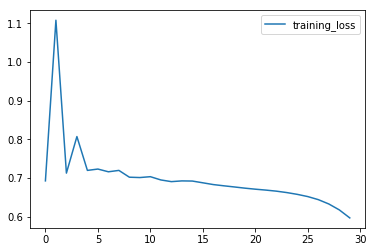

In [8]:
#plot loss
plt.plot(training_loss, label="training_loss")
plt.legend()
plt.show()

## Task 1, Part 3 :  Build your own GRUCell
In this part, you need to build your own GRU cell to achieve the GRU functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyGRUCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [9]:
from ecbm4040.xor.rnn import MyGRUCell

In [11]:
# recreate xor netowrk with your own GRU cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own GRU cell
num_units = 64
cell = MyGRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

TypeError: super(type, obj): obj must be an instance or subtype of type

### Training

In [ ]:
# YOUR TRAINING AND PLOTTING CODE HERE
X_train,y_train=create_dataset(num_samples=4000,seq_len=8)

epoch=30
training_loss=[]

with tf.Session() as sess:
    #init variable
    sess.run(tf.global_variables_initializer())
    for epc in range(epoch):
        print("epoch {} ".format(epc + 1))
        _,cur_loss=sess.run([optimizer,loss],feed_dict={input_data:X_train,output_data:y_train})
        print("loss {}".format(cur_loss))
        training_loss.append(cur_loss)
   

In [ ]:
#plot loss
plt.plot(training_loss, label="training_loss")
plt.legend()
plt.show()